# Figures for my end of rotation talk

In [ ]:
import pandas as pd
import torch
import numpy as np
import sys
import os
sys.path.append("scripts/")
from ixnos import *
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [112]:
ansari_n5p4 = iXnos(min_codon=-5, max_codon=4)
ansari_n5p4.load_state_dict(torch.load("processed-data/thp1_v2/models/ixnos_n5p4_full.pth"))
ansari_n5p4.eval() 

ansari_n3p2 = iXnos(min_codon=-3, max_codon=2)
ansari_n3p2.load_state_dict(torch.load("processed-data/thp1_v2/models/ixnos_n3p2_full.pth"))
ansari_n3p2.eval() 

iwasaki_n5p4 = iXnos(min_codon=-5, max_codon=4)
iwasaki_n5p4.load_state_dict(torch.load("models/ixnos_retrained.pth"))
iwasaki_n5p4.eval() 

iwasaki_n3p2 = iXnos(min_codon=-3, max_codon=2)
iwasaki_n3p2.load_state_dict(torch.load("processed-data/iwasaki/models/ixnos_n3p2_full.pth"))
iwasaki_n3p2.eval() 

/tmp/ipykernel_12365/1258586037.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ansari_n5p4.load_state_dict(torch.load("processed-data/thp1_v2/models/ixnos_n5p4_full.pth

iXnos(
  (layers): Sequential(
    (0): Linear(in_features=456, out_features=200, bias=True)
    (1): Tanh()
    (2): Linear(in_features=200, out_features=1, bias=True)
    (3): ReLU()
  )
)

In [102]:
gdf_path = "iXnos/genome_data/human.transcripts.13cds10.transcripts.fa"
data_dir_iwasaki = "iXnos/expts/iwasaki/process"
data_dir_ansari = "processed-data/thp1_v2/process"

def get_gdf_ydf(gdf_path, data_dir):
    train_naming_scheme = f"{data_dir}/tr_*data_table.txt"
    files_tr = glob.glob(train_naming_scheme)
    filepath_train = files_tr[0]
    print(f"Training set: found {files_tr}, using {filepath_train}")

    test_naming_scheme = f"{data_dir}/te_*data_table.txt"
    files_te = glob.glob(test_naming_scheme)
    filepath_test = files_te[0]
    print(f"Test set: found {files_te}, using {filepath_test}")

    ydf_te = pd.read_csv(
        filepath_test,
        sep='\t')
    ydf_tr = pd.read_csv(
        filepath_train,
        sep='\t')
    # Get the train and test genes
    genes_te = ydf_te["gene"].unique()
    genes_tr = ydf_tr["gene"].unique()
    # Combine these dataframes and encode each codon
    ydf = pd.concat([ydf_te, ydf_tr]).sort_values(by=["gene", "cod_idx"])
    gdf = load_gdf(ydf, gdf_path)
    return gdf, ydf

In [103]:
gdf_iwasaki, ydf_iwasaki = get_gdf_ydf(gdf_path, data_dir_iwasaki)

Training set: found ['iXnos/expts/iwasaki/process/tr_set_bounds.size.27.30.trunc.20.20.min_cts.200.min_cod.100.top.500.data_table.txt'], using iXnos/expts/iwasaki/process/tr_set_bounds.size.27.30.trunc.20.20.min_cts.200.min_cod.100.top.500.data_table.txt
Test set: found ['iXnos/expts/iwasaki/process/te_set_bounds.size.27.30.trunc.20.20.min_cts.200.min_cod.100.top.500.data_table.txt'], using iXnos/expts/iwasaki/process/te_set_bounds.size.27.30.trunc.20.20.min_cts.200.min_cod.100.top.500.data_table.txt


In [104]:
gdf_ansari, ydf_ansari = get_gdf_ydf(gdf_path, data_dir_ansari)

Training set: found ['processed-data/thp1_v2/process/tr_set_bounds.size.25.29.trunc.20.20.min_cts.200.min_cod.100.top.500.data_table.txt'], using processed-data/thp1_v2/process/tr_set_bounds.size.25.29.trunc.20.20.min_cts.200.min_cod.100.top.500.data_table.txt
Test set: found ['processed-data/thp1_v2/process/te_set_bounds.size.25.29.trunc.20.20.min_cts.200.min_cod.100.top.500.data_table.txt'], using processed-data/thp1_v2/process/te_set_bounds.size.25.29.trunc.20.20.min_cts.200.min_cod.100.top.500.data_table.txt


In [120]:
iw_iw = gdf_iwasaki["cod_gene"].apply(iwasaki_n3p2.predict_elongation, profile=True)
iw_ans = gdf_iwasaki["cod_gene"].apply(ansari_n3p2.predict_elongation, profile=True)

In [124]:
ans_iw = gdf_ansari["cod_gene"].apply(iwasaki_n3p2.predict_elongation, profile=True)
ans_ans = gdf_ansari["cod_gene"].apply(ansari_n3p2.predict_elongation, profile=True)

In [ ]:
# {row["gene"] : ydf_iwasaki.loc[ydf_iwasaki["gene"] == row["gene"], "scaled_cts"].values.tolist() for _, row in ydf_iwasaki.iterrows()}
iwasaki_profs = {}
for _, row in ydf_iwasaki.iterrows():
    gene = row["gene"]
    if gene not in iwasaki_profs.keys():
        iwasaki_profs[gene] = ydf_iwasaki.loc[ydf_iwasaki["gene"] == gene, "scaled_cts"].values.tolist()
iwasaki_profs

In [119]:
ansari_profs = {}
for _, row in ydf_ansari.iterrows():
    gene = row["gene"]
    if gene not in ansari_profs.keys():
        ansari_profs[gene] = ydf_ansari.loc[ydf_ansari["gene"] == gene, "scaled_cts"].values.tolist()

In [135]:
def get_inputs_from_gdf(row, gdf, min_codon, max_codon, leaveout=None):
    # Get input vectors for a given row of the y dataframe.
    # leaveout: index of codon to leave out in model
    gdf_gene = gdf.loc[row["gene"]]
    gdf_seq = gdf_gene["seq"]
    # Get index of E site in fasta sequence
    esite_index = (row["cod_idx"] - 20) * 3 + gdf_gene["start"] 
    # Find the nucleotides in the window
    nt_indices = np.arange(3*min_codon, 3*(max_codon + 1))
    footprint_nt = gdf_seq[
        esite_index + nt_indices[0]:
        esite_index + nt_indices[-1] + 1]
    if leaveout is not None:
        l_start = 3 * (leaveout) - max(nt_indices) - 1
        l_stop = l_start + 3
        footprint_nt = footprint_nt[: l_start] + footprint_nt[l_stop:] if l_stop != 0 else footprint_nt[: l_start]
    # Convert nt string into codons 
        # NOTE: assumes your nt footprint is an in frame CDS containing just the codons we wanna look at
    footprint_codons = [footprint_nt[i:i+3] for i in range(0, len(footprint_nt), 3)]
    # Assemble input tensor
    codon_vector = np.concatenate([iXnos.encode(i, iXnos.get_codon_to_id()) for i in footprint_codons])
    nt_vector = np.concatenate([iXnos.encode(i, iXnos.get_nt_to_id()) for i in footprint_nt])
    input_vector = np.concatenate([codon_vector, nt_vector])
    input_vector = torch.from_numpy(input_vector).to(torch.float32)
    return input_vector

## Comparing Ansari / Iwasaki Model Predictions on Iwasaki Test Data

In [136]:
ydf_iwasaki["X"] = ydf_iwasaki.apply(get_inputs_from_gdf, axis=1, gdf=gdf_iwasaki, min_codon=-3, max_codon=2)

In [171]:
ydf_iwasaki["iwasaki_pred"] = ydf_iwasaki.apply(lambda row: iwasaki_n3p2.predict(row["X"]).item(), axis=1)

In [172]:
ydf_iwasaki["ansari_pred"] = ydf_iwasaki.apply(lambda row: ansari_n3p2.predict(row["X"]).item(), axis=1)

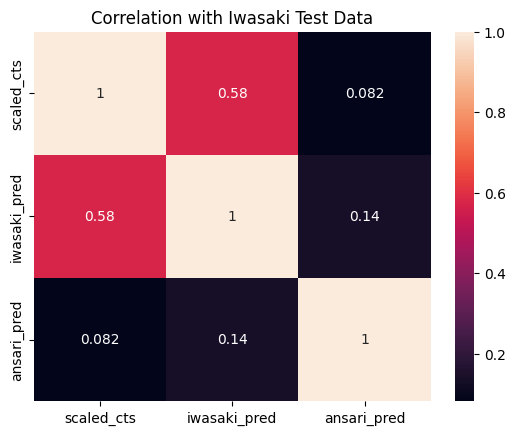

In [173]:
sns.heatmap(ydf_iwasaki[["scaled_cts", "iwasaki_pred", "ansari_pred"]].corr(method="pearson"), annot=True)
plt.title("Correlation with Iwasaki Test Data")
plt.show()

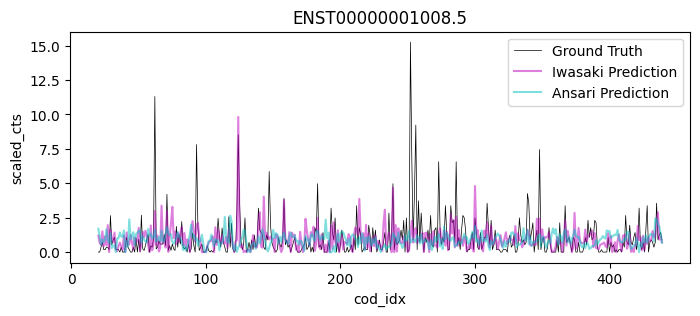

In [ ]:
gene = "ENST00000001008.5"
ydf_gene = ydf_iwasaki[ydf_iwasaki["gene"] == gene]
fig, ax = plt.subplots(figsize=(8, 3))
a = 0.5
sns.lineplot(ydf_gene, x="cod_idx", y="scaled_cts", label="Ground Truth", ax=ax, c="k", linewidth=.5)
sns.lineplot(ydf_gene, x="cod_idx", y="iwasaki_pred", label="Iwasaki Prediction", ax=ax, alpha=a, c="m")
sns.lineplot(ydf_gene, x="cod_idx", y="ansari_pred", label="Ansari Prediction", ax=ax, alpha=a, c="c")
ax.set_title(gene)
plt.show()


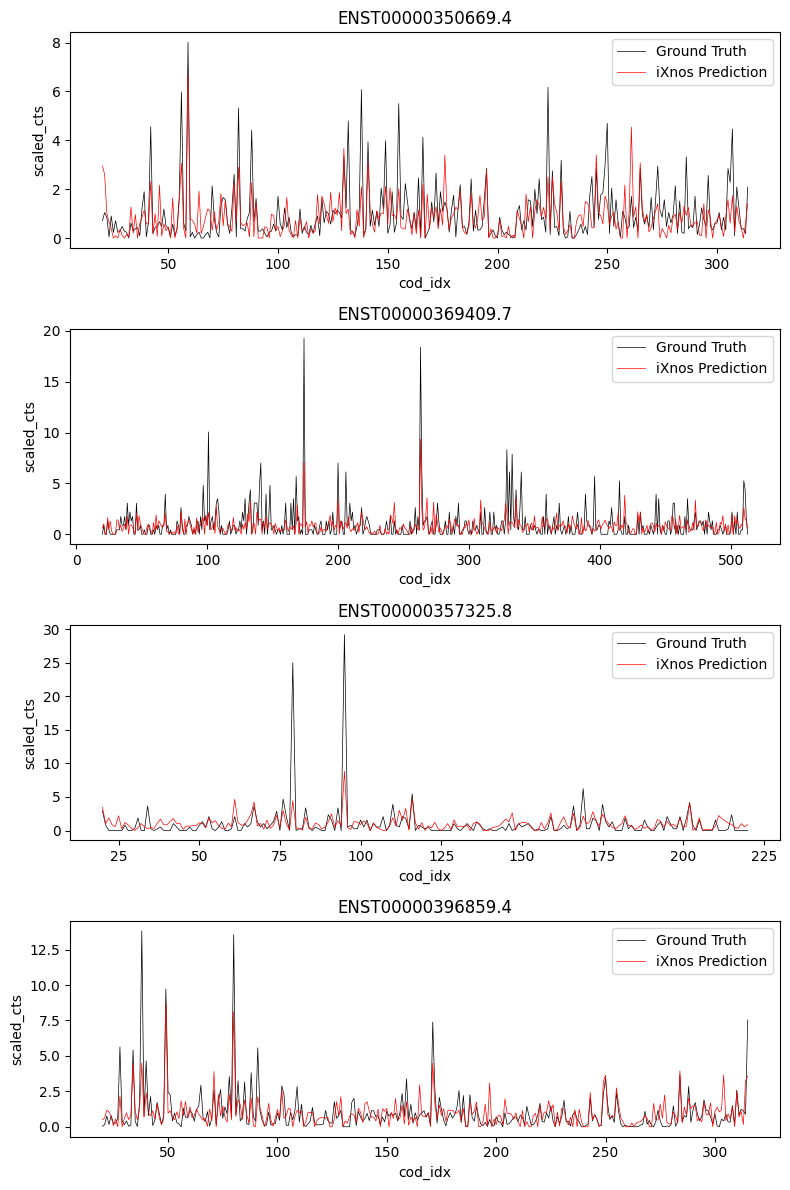

In [202]:
# gene = "ENST00000001008.5"
n = 4
fig, axs = plt.subplots(n, 1, figsize=(8, 3*n))
for i, gene in enumerate(np.random.choice(ydf_iwasaki["gene"], n)):
    ydf_gene = ydf_iwasaki[ydf_iwasaki["gene"] == gene]
    a = 0.5
    sns.lineplot(ydf_gene, x="cod_idx", y="scaled_cts", label="Ground Truth", ax=axs[i], c="k", linewidth=.5)
    sns.lineplot(ydf_gene, x="cod_idx", y="iwasaki_pred", label="iXnos Prediction", ax=axs[i], c="r", linewidth=.5)
    # sns.lineplot(ydf_gene, x="cod_idx", y="ansari_pred", label="Ansari Prediction", ax=ax, alpha=a, c="c")
    axs[i].set_title(gene)
plt.tight_layout()
plt.show()

## Comparing Ansari / Iwasaki Model Predictions on Ansari Test Data

In [137]:
ydf_ansari["X"] = ydf_ansari.apply(get_inputs_from_gdf, axis=1, gdf=gdf_ansari, min_codon=-3, max_codon=2)

In [153]:
ydf_ansari["iwasaki_pred"] = ydf_ansari.apply(lambda row: iwasaki_n3p2.predict(row["X"]).item(), axis=1)
ydf_ansari["ansari_pred"] = ydf_ansari.apply(lambda row: ansari_n3p2.predict(row["X"]).item(), axis=1)

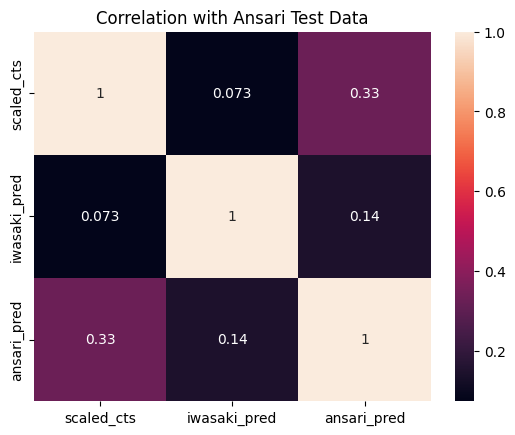

In [156]:
sns.heatmap(ydf_ansari[["scaled_cts", "iwasaki_pred", "ansari_pred"]].corr(), annot=True)
plt.title("Correlation with Ansari Test Data")
plt.show()

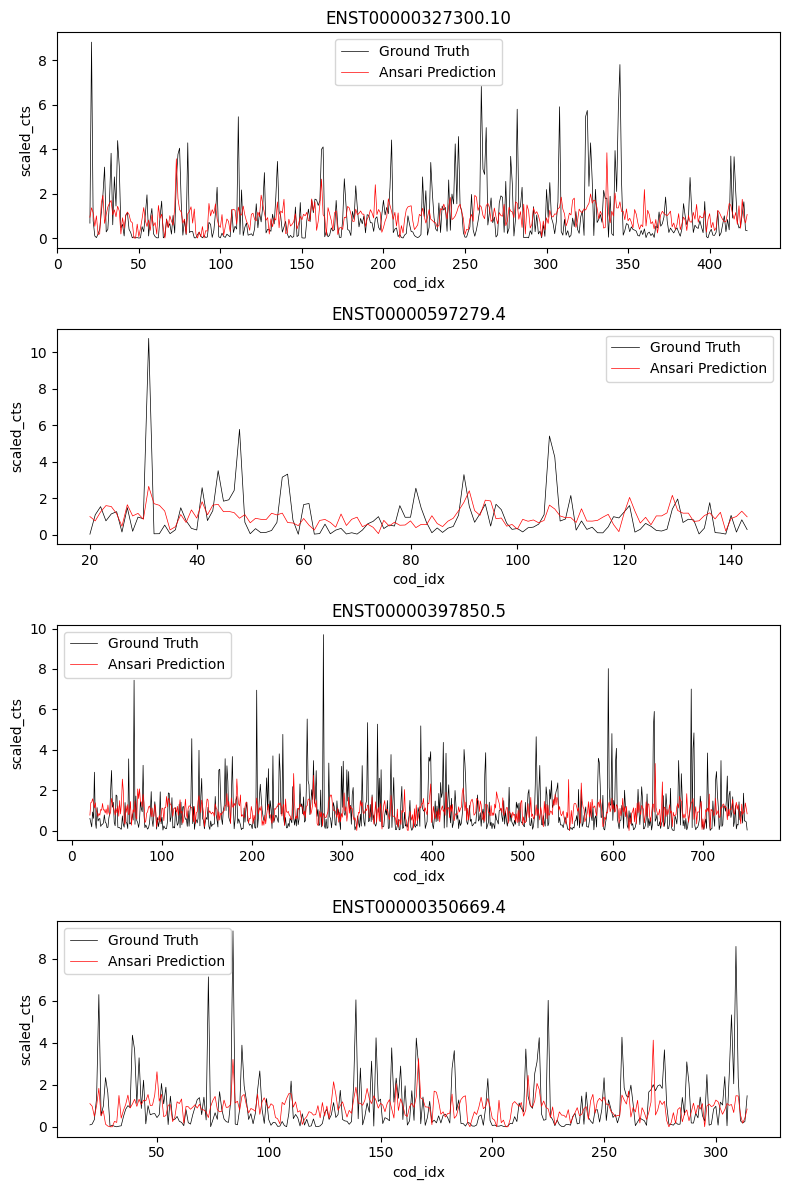

In [208]:
n = 4
fig, axs = plt.subplots(n, 1, figsize=(8, 3*n))
for i, gene in enumerate(np.random.choice(ydf_ansari["gene"], n)):
    ydf_gene = ydf_ansari[ydf_ansari["gene"] == gene]
    a = 0.5
    sns.lineplot(ydf_gene, x="cod_idx", y="scaled_cts", label="Ground Truth", ax=axs[i], c="k", linewidth=.5)
    # sns.lineplot(ydf_gene, x="cod_idx", y="iwasaki_pred", label="iXnos Prediction", ax=axs[i], c="r", linewidth=.5)
    sns.lineplot(ydf_gene, x="cod_idx", y="ansari_pred", label="Ansari Prediction", ax=axs[i], c="r", linewidth=.5)
    axs[i].set_title(gene)
plt.tight_layout()
plt.show()

# pytorch vs OG vs OG yeast

In [194]:
# class Experiment():
#     # Class Constants: Indexing for codons / nucleotides for encoding
#     ALPHA = "ACGT"  
#     NTS = ["A", "C", "G", "T"]
#     # Indices for nucleotide and codon windows
#     NT_INDICES = np.arange(-15, 15)  # Nucleotide indices window
#     CODON_INDICES = np.arange(-5, 5)  # Codon indices window
#     def __init__(self, model, ydf, gdf_path):
#         self.model = model
#         self.ydf = ydf
#         self.gdf_path = gdf_path
#         self.gdf = self.load_gdf()
#         # Define CODONS, COD2ID, and other mappings here in __init__
#         self.CODONS = [x + y + z for x in self.ALPHA for y in self.ALPHA for z in self.ALPHA]
#         self.COD2ID = {codon: idx for idx, codon in enumerate(self.CODONS)}
#         self.ID2COD = {idx: codon for codon, idx in self.COD2ID.items()}
#         self.NT2ID = {nt: idx for idx, nt in enumerate(self.NTS)}
#         self.ID2NT = {idx: nt for nt, idx in self.NT2ID.items()}
#         # Apply the model to all codons in the y dataframe
#         self.ydf["encoding"] = self.ydf.apply(self.get_inputs, axis=1)
#         self.ydf["prediction"] = self.ydf["encoding"].apply(lambda x: self.model(x).item())
#         # Get pearson r
#         self.pearson_r = pearsonr(self.ydf["scaled_cts"], self.ydf["prediction"])
    

#     def load_gdf(self):
#         records = list(SeqIO.parse(self.gdf_path, "fasta"))
#         gdf = pd.DataFrame({
#                 'ID': [record.id for record in records],
#                 'seq': [str(record.seq) for record in records]
#             }).set_index("ID")
#         genes_from_codons = pd.DataFrame(self.ydf.groupby("gene")["cod_seq"].agg(''.join))
#         gdf.loc[genes_from_codons.index, "cod_gene"] = genes_from_codons["cod_seq"].values
#         gdf = gdf.dropna()
#         assert all(gdf.apply(lambda row: row["cod_gene"] in row["seq"], axis=1))
#         # gdf.apply(lambda row: row["cod_gene"] in row["seq"], axis=1)
#         gdf["start"] = gdf.apply(lambda row: row['seq'].find(row['cod_gene']), axis=1)
#         return gdf
    
#     def encode(val, ref:dict):
#         # Given a dict (ref) mapping values to indices a value (val), 
#         # return a 1-hot-encoded numpy array of that value
#         # e.g. encode(A , {A : 0, T : 1, ...}) -> [1, 0, 0, 0]
#         output = np.zeros(len(ref))
#         output[ref[val]] = 1
#         return output
#     # def encode(val, arr:list):
#     #     # Given an array of potential values (arr) and a value (val), 
#     #     # return a 1-hot-encoded numpy array of that value
#     #     # e.g. encode(A ,[A, T, G, C]) -> [1, 0, 0, 0]
#     #     # TODO: replace this with lookup in codon, nt dictionaries
#     #     output = np.zeros(len(arr))
#     #     output[arr.index(val)] = 1
#     #     return output
    
#     def get_inputs(self, row):
#         # Get input vectors for a given row of the y dataframe.
#         gdf_gene = self.gdf.loc[row["gene"]]
#         gdf_seq = gdf_gene["seq"]
#         # Get index of E site in fasta sequence
#         esite_index = (row["cod_idx"] - 20) * 3 + gdf_gene["start"] 
#         # Find the nucleotides in the window
#         footprint_nt = gdf_seq[
#             esite_index + nt_indices[0]:
#             esite_index + nt_indices[-1] + 1]
#         # Convert nt string into codons 
#         # NOTE: assumes your nt footprint is an in frame CDS containing just the codons we wanna look at
#         footprint_codons = [footprint_nt[i:i+3] for i in range(0, len(footprint_nt), 3)]
#         # Assemble input tensor
#         codon_vector = np.concatenate([encode(i, self.COD2ID) for i in footprint_codons])
#         nt_vector = np.concatenate([encode(i, self.NT2ID) for i in footprint_nt])
#         input_vector = np.concatenate([codon_vector, nt_vector])
#         input_vector = torch.from_numpy(input_vector).to(torch.float32)
#         return input_vector
